<img src = 'Imagens/logo data.aqa.jpg' >

<br>

# <span style = "font-family:Times New Roman"><font color = #0f4e8c>Decision Tree Regressor 

<br>


<br>

## <span style = "font-family:Times New Roman"><font color = #0f4e8c> O que é uma Decision Tree ?
    
<br>
 


<br>

O Decision Tree é um algoritmo que pode ser utilizado tanto para tarefas de classificação quanto para tarefas de regressão, denominação comumente tratada como CART (Classification and Regression Tree) . Quando ele for utilizado para classificação, irá prever variáveis categóricas e quando utilizado para regressão, preverá números reais. Nesta aula veremos específicamente o algoritmo voltado à regressão. 

O modelo possui um funcionamento, como o próprio nome indica, que se assemelha ao de uma árvore. A árvore apresenta nodes (nódulos) no qual estão presentes variáveis explicativas que vão determinar espaços de previsões para os valores a serem estimados de acordo com as condições impostas pelo modelo.

Para realizar uma previsão de uma observação em um Decision Tree Regressor se costuma utilizar a média dos dados de treino no espaço da região analisada. Na seção abaixo iremos apresentar um exemplo para elucidar estes e mais outros conceitos do algoritmo.

<br>

## <span style = "font-family:Times New Roman"><font color = #0f4e8c> Decision Tree Regressor
    
<br>


<br>

Iremos visualizar como o algoritmo se comporta no dataset *Red Wine Quality* que pode ser acessado no [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/wine+quality). O dataset possui uma série de features que podem ser utilizadas para estimar a qualidade de vinhos vermelhos. Primeiro, para efeito de visualizações mais simples e conceitualizações básicas, iremos ver como ele se comporta em somente uma feature, o teor alcoólico.

<br>


In [1]:
# Importando bibliotecas para carregar e visualizar dados 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dados/winequality-red.csv')

In [3]:
# Definindo variável alvo e variável preditora

y = data[['quality']]
X = data[['alcohol']]

In [4]:
from sklearn.model_selection import train_test_split

# Realizando split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [5]:
from sklearn import tree # Importando a árvore de decisão

# Treinando o modelo 

regression = tree.DecisionTreeRegressor(max_depth= 2)
regression = regression.fit(X_train, y_train)

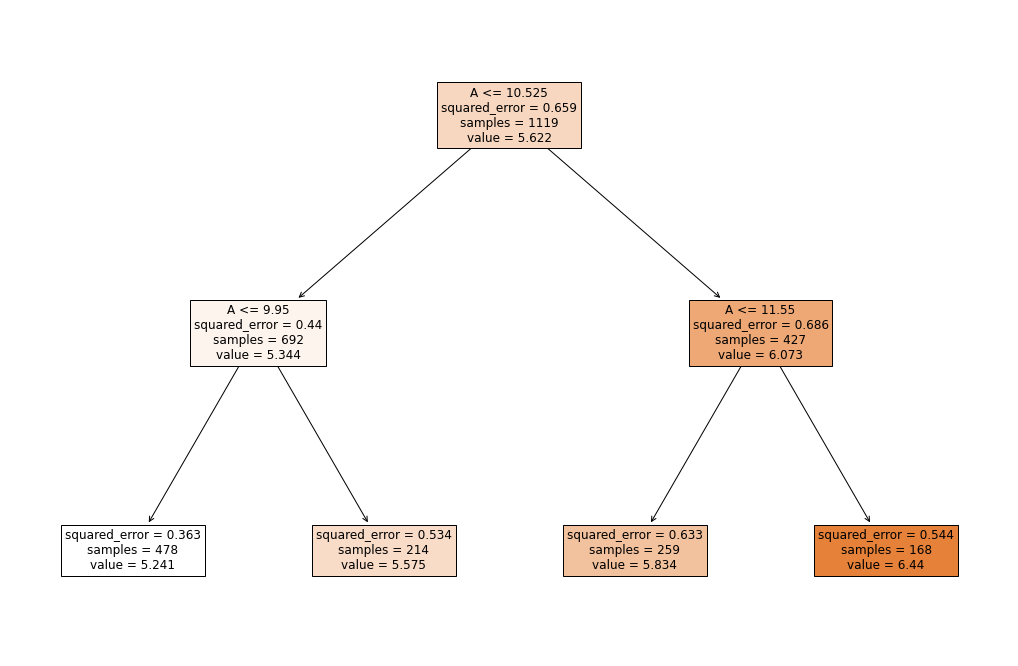

In [6]:
# Plotando a árvore

plt.figure(figsize=(18,12))
tree.plot_tree(regression, feature_names= 'A',fontsize= 12, filled = True)

plt.show()


<br>

Na imagem acima, podemos ver como se comporta uma Decision Tree em uma tarefa de regressão. O primeiro node, é o *root*, a raiz da árvore. A partir da raiz surgem os outros nódulos da árvore de decisão. Sendo que os nódulos são conectados pelo que se denomina de *branchs*, que são justamente os ramos da árvore. 

Neste caso os nódulos que compõem a árvore tem como base para determinar o valor da qualidade do vinho o teor de álcool. Após a raiz, realiza-se um *split* da árvore em duas branchs principais, uma na qual os valores possuem um teor álcoolico menor do que 10.525 (valores à esquerda da árvore) e uma na qual os valores possuem um teor álcoolico maior do que 10.525 (valores à direita da árvore). Por fim tem-se as *leafs*, que possuem uma amostra com um determinado número de observações no qual o algoritmo irá realizar a previsão de acordo com a média do valor das observações desta amostra. 

Para exemplificar um pouco mais, iremos criar um plot abaixo com as regiões de previsão do algoritmo.

<br>


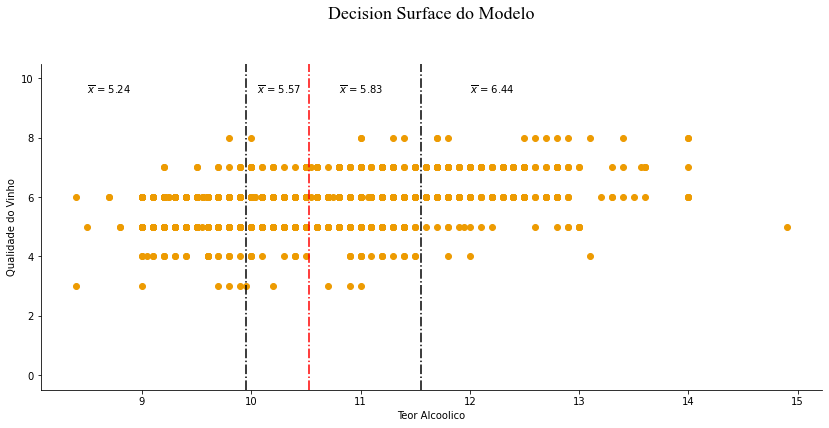

In [7]:
# Configurando customizações do Modelo

csfont = {'fontname':'Times New Roman'}
fig, ax = plt.subplots(figsize=(14, 6))
ax.spines[['right','top']].set_visible(False)

# Realizando plots 

plt.plot(X,y, 'o', color = '#ed9b02')
plt.vlines(x = [10.525, 9.95, 11.55], ymin=0,  ymax = 10, colors = ['red', 'black' ,'black'],
           linestyles = 'dashdot', transform=ax.get_xaxis_transform())

plt.text(8.5, 9.5, '$\overline{x}$ = 5.24', fontsize = 10)
plt.text(10.05, 9.5, '$\overline{x}$ = 5.57', fontsize = 10)
plt.text(10.8, 9.5, '$\overline{x}$ = 5.83', fontsize = 10)
plt.text(12, 9.5, '$\overline{x}$ = 6.44', fontsize = 10)

# Atribuindo e modificando títulos 

plt.ylabel('Qualidade do Vinho')
plt.xlabel('Teor Alcoolico')
plt.title('Decision Surface do Modelo', **csfont,fontsize = 18, y = 1.12 )
plt.show()


<br>

Na imagem acima conseguimos ver as regiões de decisão do modelo. O tracejado vermelho representa o primeiro split e os tracejados pretos representam os outros splits. Para cada uma das regiões de divisão, o modelo irá prever os resultados de acordo com a média dos pontos daquela região. Então, por exemplo, após o vinho ultrapassar um teor alcóolico de 11.55, a Decision Tree irá prever que a sua qualidade é de 6.44 . 

<br>



<br>

### <span style = "font-family:Times New Roman"><font color = #0f4e8c> Recursive Binary Splitting
    
<br>


O processo que acabamos de ver nas divisões que começam na raiz da árvore até a suas folhas,  se chama de divisão binária recursiva (*recursive binary splitting*). A maneira de o modelo garantir que, ao realizar as divisões, o erro será o menor possível é utilizar o *Residual Sum of Squares (RSS)* . Neste caso, o RSS se comportará da seguinte maneira :

<br>


## $ RSS = \sum\limits^J_{j = 1}\sum_\limits{i \in R_j} (y_i - \hat{y}_i)^2 $


<br>

Aqui possuímos $J$ regiões que estão dividas em $R_j$ espaços, $R_1$, $R_2$,..., $R_j$. A ideia é que o modelo irá realizar sucessivas divisões em um determinado espaço das $X_n$ variáveis de tal maneira que estas divisões irão gerar as regiões $R_j$ que minimizam o RSS. A grosso modo, o modelo irá repartir as regiões de decisão pelos pontos de corte em que a razão $y_i - \hat{y}_{i}$ seja a menor possível.

Para um aprofundamento matemático maior, recomendo a leitura do An Introduction to Statistical Learning with Applications in R Second Edition, cap. 8. Para uma visualização mais simples e eficiente do problema, também existe um vídeo excelente do [**StatQuest with Josh Starmer**](https://www.youtube.com/watch?v=g9c66TUylZ4).

Muito bem, agora que treinamos o modelo iremos avaliar a sua performance nos dados de treino para verificar se a sua performance é satisfatória. 

<br>


In [8]:
regression.score(X_train, y_train)

0.26346122309425635


<br>

Pela métrica R² embutida no sklearn, podemos perceber que a performance do modelo é bem baixa e não consegue justificar nem metade das previsões realizadas. Vamos avaliar como isso pode ser aprimorado na próxima seção.

<br>


<br>

## <span style = "font-family:Times New Roman"><font color = #0f4e8c> Variância e Viés 
    
<br>



<br>

Na imagem abaixo, temos no eixo y como se comporta o erro de um modelo em função de sua complexidade. O erro dos modelos podem ser decompostos pelo erro irredutível, o **viés** e a **variância** . 

<br>



<br>

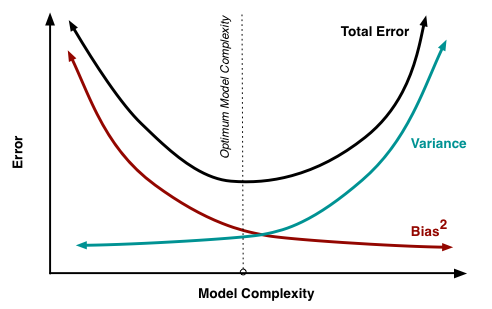  <font color = #777877> <br> <br> <center> Fonte : [**Scott Fortmann-Roe**](http://scott.fortmann-roe.com/docs/BiasVariance.html) </center>

### $Erro (\hat{y}) = viés² + variância + ruído$

<br>


O erro irredutível é um ruído inerente à qualquer modelo, ele faz com que as previsões não alcancem a perfeição. O viés representa a diferença da função do conjunto de dados real com relação a função estimada pelo modelo. E a variância representa a variabilidade para o conjunto de dados de treino. Se ela for elevada, é possível que o modelo não saiba generalizar estimativas para novos conjuntos de dados.

No caso do exemplo acima, sabemos que o viés é elevado porque o modelo não sabe generalizar as previsões da função real (*underfitting*) que estima a qualidade dos vinhos . Isso implica em dizer que nós temos que aumentar a variância do modelo, para que o erro por viés diminua e o algoritmo se aproxime de um ponto ótimo de complexidade. É válido ressaltar que a palavra "aproxime" foi escrita justamente porque não é possível chegar ao nível de complexidade ótima. Isto só seria possível caso possuíssemos os valores populacionais dos dados, o que, via de regra, não acontece quando tentamos estimar valores no mundo real.

<br>

## <span style = "font-family:Times New Roman"><font color = #0f4e8c> Cross Validation
    
<br>

Uma maneira de diagnosticar sintomas como viés e variância, é através do Cross Validation (CV), que é um método de reamostragem. Neste notebook iremos abordar o *K-fold Cross Validation*, porém outras abordagens para validação cruzada também são possíveis. 

<br>


<br> <img src = 'Imagens/grid_search_cross_validation.png' width = 550>  <font color = #777877> <br> <br> <center> Fonte : [**Scikitlearn**](https://scikit-learn.org/stable/modules/cross_validation.html) </center>


<br>

No K-fold, o que ocorre é que os dados de treino são introduzidos em algumas repartições. No exemplo acima os dados são repartidos em 5 amostras que, por sua vez, são repartidas em um conjunto de treino e teste. Após isso é avaliado como a performance do conjunto de dados da validação cruzada se compara com o conjunto de dados de treino geral. 

Como vimos que a nossa performance foi baixa no modelo anterior, iremos criar um novo modelo com as outras variáveis explicativas e então realizar o cross-validation. 

<br>


In [9]:
# definindo novas variáveis explicativas

X2 = data.iloc[:, :11]

In [10]:
# Dividindo em treino e teste

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size= 0.3, random_state= 42)


<br>

Agora que os dados foram divididos entre treino e teste iremos treinar o modelo, porém, desta vez, ao invés de utilizar um max_depth de 2, vamos utilizar uma max_depth de 15. 

<br>


In [11]:
# Treinando o modelo 

reg_2 = tree.DecisionTreeRegressor(max_depth= 15, random_state= 42)
reg_2 = reg_2.fit(X2_train, y_train)

In [12]:
reg_2.score(X2_train, y_train)

0.9778244389216306

    
<br>

Podemos observar que a performance aumenta bruscamente ao aumentar a profundidade da árvore. Agora vamos observar como os dados se comportam na validação cruzada. Faremos uma validação com 5 folds, utilizando a métrica R² para avaliar a performance do modelo. 

<br>


In [13]:
from sklearn.model_selection import cross_val_score

# Realizando a validação cruzada 

cvs = cross_val_score(reg_2, 
                      X2_train, y_train, 
                      scoring= 'r2', 
                      cv = 5
                     )
cvs.mean()

-0.01350600405009481

In [14]:
reg_2.score(X2_test, y_test)

0.05181776513100511


<br>

A validação cruzada indica que o nosso modelo está passando por um processo de *overfitting*, ou seja, o algoritmo performa bem nos dados de treino, porém, não consegue generalizar as informações para realizar previsões nos dados de teste. 

Uma das maneiras que podemos fazer para tentar reduzir o overfitting do modelo é diminuindo a sua variância ao ajustar os hiperparâmetros.  

<br>

<br>

## <span style = "font-family:Times New Roman"><font color = #0f4e8c> Hyperparameter Tuning
    
<br>



Os hiperparâmetros, são parâmetros que não aprendidos diretamente pelo modelo. No caso do nosso Decision Tree Regressor, temos, por exemplo, hiperparâmetros como max_depth, que indica a profundida da árvore, min_samples_leaf, que indica a quantidade mínima de amostras em uma previsão e max_features que indicam a quantidade de variáveis que o modelo irá utilizar para realizar previsões.

A procura de hiperparâmetros dos modelos pode ocorrer através de técnicas como o Randomized Search CV, que procura os melhores parâmetros de maneira aleatória  e o Grid Search CV, que busca o melhor parâmetro dentro do espaço amostral de parâmetros fornecidos. Cada um possui suas limitações em termos computacionais e de previsão do modelo.

Nesta aula, vamos verificar como se comporta o Grid Search CV nos três parâmetros comentados no começo desta seção. 

<br>


In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# Definindo uma Decision Tree

dt_reg = tree.DecisionTreeRegressor(random_state= 42)

In [17]:
# Definindo os parâmetros que o GridSearch irá avaliar 

parameters = {'max_depth' : [2 , 5 , 10 , 15],
              'min_samples_leaf' : [ 0.015 , 0.025, 0.05, 0.01],
              'max_features' : [4, 8, 10 , 11]
             }

In [18]:
# Criando o GridSearch

gscv = GridSearchCV(estimator = dt_reg,
                   param_grid= parameters,
                   scoring = 'r2',
                   cv = 5)

In [19]:
# Treinando o modelo com o GridSearch

gscv = gscv.fit(X2_train, y_train)

In [20]:
print('Os melhores parâmetros são :' , gscv.best_params_)

Os melhores parâmetros são : {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 0.025}



<br>

Dentro dos valores que passamos para os parâmetros acima, o GridSearchCV selecionou àquele que possui a melhor performance do R² na validação cruzada. Agora iremos ver como o desempenho do estimador se comporta nos dados de teste.

<br>


In [21]:
# Escolhendo o melhor estimador fornecido pelo GridSearchCV

best_model = gscv.best_estimator_

In [22]:
best_model.score(X2_test, y_test)

0.2953013076553983


<br>

O score do modelo de 0.29 é bem superior ao 0.05 obtido anteriormente, o que indica que o GridSearchCV contribui para escolher os melhores hiperparâmetros para treinar o modelo. Porém, fica claro que a performance do algoritmo não é robusta para acertar um terço das previsões.

Isso ocorre porque as Decision Trees de fato são sensíveis à generalização de dados. Esse fenômeno pode ser corrigido através de *Ensembles*, que são técnicas para agrupar algoritmos para obter melhores previsões. Neste notebook não passaremos por este conteúdo. 

<br>


------------------------------
<br>

## <span style = "font-family:Times New Roman"><font color = #0f4e8c> Sintetizando 

<br>
    
Nesta aula vimos :
    
    
- O que é uma Decision Tree
<br>
    
- O que são os *nodes* da árvore de decisão, como o modelo realiza sucessivamente os *splits*
<br>

- Quais são os componentes do erro de um modelo 
<br>

- Como realizar uma Validação Cruzada
<br>
    
- Ajuste de Hiperparâmetros     
    
    
    
-----------------------------------------------------------
    
<br>

    
    


<br>

## <span style = "font-family:Times New Roman"><font color = #0f4e8c> Referências 

<br>


-  James G.,  Witten D., Hastie T., Tibshirani R., An Introduction to Statistical Learning with Applications in R Second Edition, 2021
<br>

- https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79

<br>

## <span style = "font-family:Times New Roman"><font color = #0f4e8c>  Material Elaborado Por  

<tr>
<td> <img src="Imagens/Thiago.png" width = "150" align = "left"/> </td>
</tr>

<br>


<br>


<br>

<tr>
<td> <a href="https://www.linkedin.com/in/thiagopd/" > <img src = "Imagens/linkedin.png" width = "25"  align = "left" /> </a>  </td>             <td> <a href="https://github.com/tp-duarte" > <img src = "Imagens/GitHub-Logo.png" width = "60" height = "100" align = "left" /> </a>  </td>  </tr>

<pre> <font size =  5 align = 'up' > Thiago Duarte 